In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os

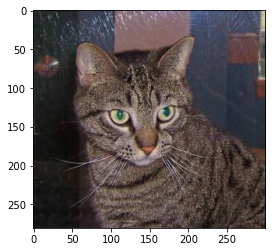

In [2]:
img = image.load_img('Dataset/train/Cat/1.JPG')
plt.imshow(img)

In [3]:
cv2.imread('Dataset/train/Cat/1.JPG').shape  #height, width, and channels of image

(281, 300, 3)

In [4]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset = train.flow_from_directory('Dataset/train/',
                                           target_size= (200,200),
                                           classes=['cat', 'dog'],
                                           batch_size= 10,
                                           class_mode='binary')

validation_dataset = validation.flow_from_directory('Dataset/validation/',
                                           target_size= (200,200),
                                           classes=['cat', 'dog'],
                                           batch_size= 10,
                                           class_mode='binary') # use binary because have only two class : Cat and Dog

Found 200 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    
                                   ])

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])


In [8]:
model_fit = model.fit(train_dataset,
                      validation_data = validation_dataset,
                      epochs = 10,
                      callbacks=[tf.keras.callbacks.CSVLogger('history.csv')],
                      shuffle = True)
_, accuracy = model.evaluate(train_dataset, steps=len(train_dataset), batch_size= 10)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

Epoch 1/10
20/20 [==============================] - 4s 170ms/step - loss: 1.3723 - accuracy: 0.5250 - val_loss: 0.6856 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 3s 163ms/step - loss: 0.6974 - accuracy: 0.4950 - val_loss: 0.6867 - val_accuracy: 0.5000
Epoch 3/10
20/20 [==============================] - 3s 160ms/step - loss: 0.7083 - accuracy: 0.5700 - val_loss: 0.6656 - val_accuracy: 0.5625
Epoch 4/10
20/20 [==============================] - 3s 165ms/step - loss: 0.6648 - accuracy: 0.6150 - val_loss: 0.5840 - val_accuracy: 0.8375
Epoch 5/10
20/20 [==============================] - 3s 160ms/step - loss: 0.5552 - accuracy: 0.7050 - val_loss: 0.4844 - val_accuracy: 0.7875
Epoch 6/10
20/20 [==============================] - 3s 162ms/step - loss: 0.4660 - accuracy: 0.8200 - val_loss: 0.3420 - val_accuracy: 0.9125
Epoch 7/10
20/20 [==============================] - 3s 161ms/step - loss: 0.2894 - accuracy: 0.8800 - val_loss: 0.1177 - val_accuracy: 0.9812
Epoch 

In [9]:
his = pd.read_csv('history.csv') 
his.head(10)

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.525,1.372252,0.50000,0.685585
1,1,0.495,0.697428,0.50000,0.686659
2,2,0.570,0.708284,0.56250,0.665626
3,3,0.615,0.664807,0.83750,0.583977
4,4,0.705,0.555200,0.78750,0.484434
5,5,0.820,0.465976,0.91250,0.341983
6,6,0.880,0.289367,0.98125,0.117742
7,7,0.980,0.109937,1.00000,0.025867
8,8,0.990,0.053707,0.99375,0.018587
9,9,0.995,0.030011,0.99375,0.021397


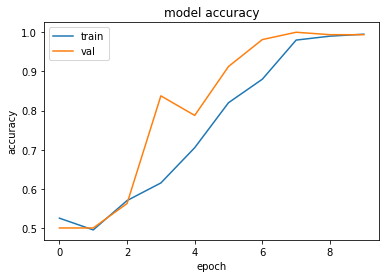

In [10]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

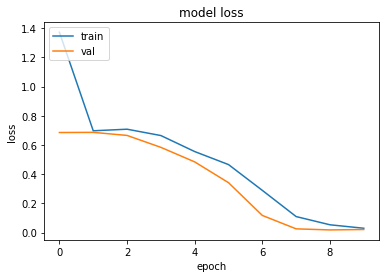

In [11]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

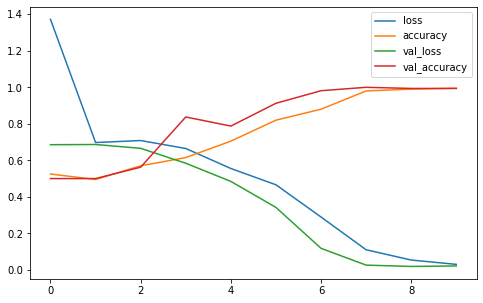

In [12]:
pd.DataFrame(model_fit.history).plot(figsize=(8,5))
plt.show()

In [13]:
model.summary() #Detail of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [14]:
# Check models first to see if file exists already.
# If not, the model is saved to disk.
if os.path.isfile('models/CNN_predict_model.h5') is False:
    model.save('models/CNN_predict_model.h5')

In [15]:
validation_dataset.class_indices

{'cat': 0, 'dog': 1}

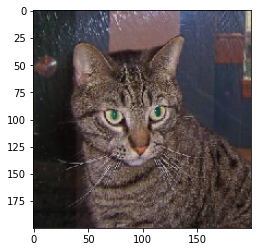

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


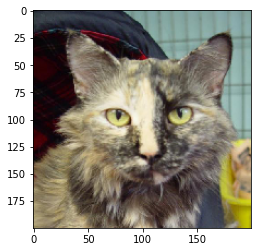

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


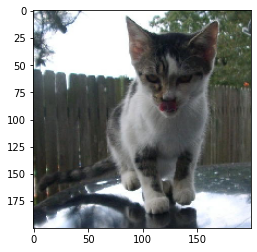

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


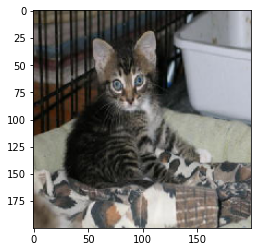

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


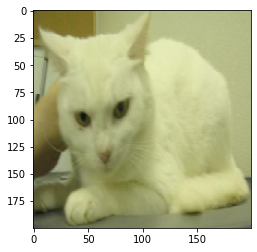

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


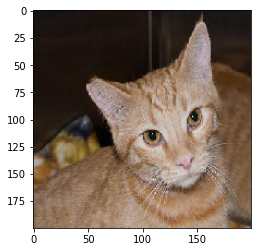

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


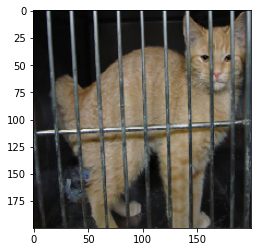

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


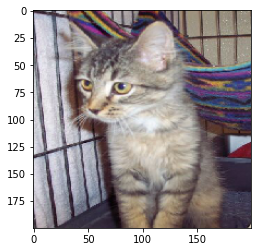

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


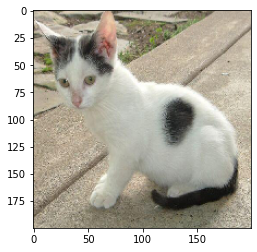

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


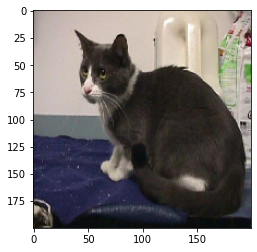

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


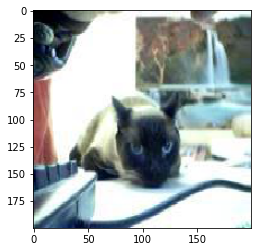

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


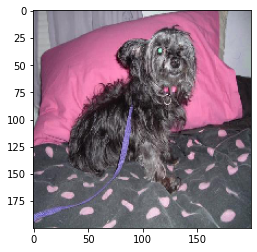

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


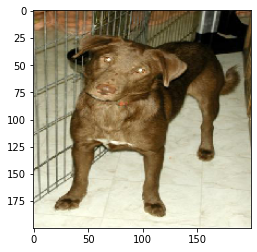

This is  Dog 🐶🐶🐶🐶🐶🐶🐶🐶


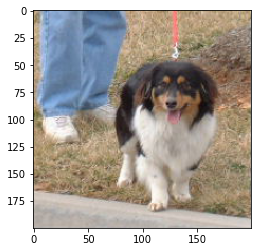

This is  Dog 🐶🐶🐶🐶🐶🐶🐶🐶


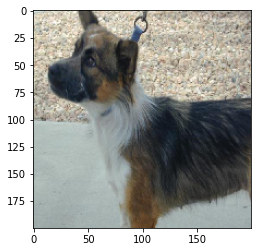

This is  Dog 🐶🐶🐶🐶🐶🐶🐶🐶


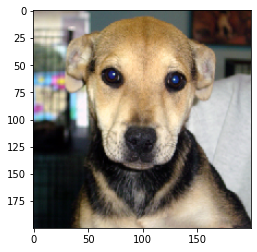

This is  Dog 🐶🐶🐶🐶🐶🐶🐶🐶


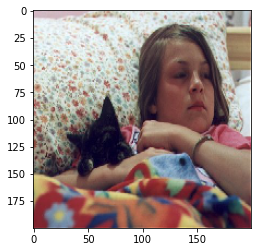

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


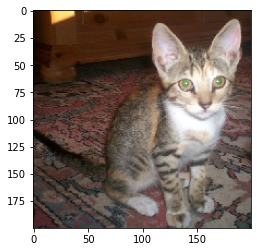

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


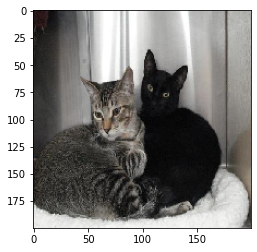

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


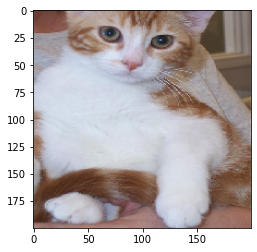

This is  Cat 🐈🐈🐈🐈🐈🐈🐈🐈


In [16]:
dir_path = 'Dataset/test' #parht of images that you want to test

for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'/'+i, target_size= (200,200, 3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    
    if val == 0:
        picture = "Cat 🐈🐈🐈🐈🐈🐈🐈🐈"
    else:
        picture = "Dog 🐶🐶🐶🐶🐶🐶🐶🐶"
        
    print("This is " , picture)

In [17]:
from tensorflow.keras.models import load_model
new_model = load_model('models/CNN_predict_model.h5')

In [18]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0